# Generate Histogram Figure for GREC Length Distribution

In [3]:
import sys
sys.path.append("../src")
import config

In [2]:
from utils.grec import get_metrics
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
%matplotlib inline

### Set global plt params

In [ ]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.family'] = 'serif'

#### GREC METRICS

In [4]:
relation = 'institution'
j_file = f'{config.GREC_JSON_DIR}/{relation}_augment-200526.json'
metrics_i = get_metrics(j_file, relation)

relation = 'education'
j_file = f'{config.GREC_JSON_DIR}/{relation}_augment-200526.json'
metrics_ed = get_metrics(j_file, relation)

relation = 'dob'
j_file = f'{config.GREC_JSON_DIR}/{relation}_augment-200526.json'
metrics_dob = get_metrics(j_file, relation)

relation = 'pob'
j_file = f'{config.GREC_JSON_DIR}/{relation}_augment-200526.json'
metrics_pob = get_metrics(j_file, relation)

relation = 'pod'
j_file = f'{config.GREC_JSON_DIR}/{relation}_augment-200526.json'
metrics_pod = get_metrics(j_file, relation)

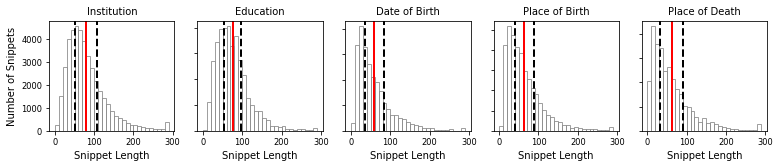

In [6]:
x_i = metrics_i['lengths']
min_x_i = metrics_i['min_no_outlier']
max_x_i = metrics_i['max_no_outlier']

x_ed = metrics_ed['lengths']
min_x_ed = metrics_ed['min_no_outlier']
max_x_ed = metrics_ed['max_no_outlier']

x_dob = metrics_dob['lengths']
min_x_dob = metrics_dob['min_no_outlier']
max_x_dob = metrics_dob['max_no_outlier']

x_pob = metrics_pob['lengths']
min_x_pob = metrics_pob['min_no_outlier']
max_x_pob = metrics_pob['max_no_outlier']

x_pod = metrics_pod['lengths']
min_x_pod = metrics_pod['min_no_outlier']
max_x_pod = metrics_pod['max_no_outlier']

plt.rcParams["font.size"] = "12"
bins = list(range(0,300,10))

# full image
fig, axs = plt.subplots(1, 5)

axs[0].hist(np.clip(x_i, bins[0], bins[-1]), bins=bins, color="white", edgecolor='gray', alpha=0.75)
axs[1].hist(np.clip(x_ed, bins[0], bins[-1]), bins=bins, color="white", edgecolor='gray', alpha=0.75)
axs[2].hist(np.clip(x_dob, bins[0], bins[-1]), bins=bins, color='white', edgecolor='gray', alpha=0.75)
axs[3].hist(np.clip(x_pob, bins[0], bins[-1]), bins=bins, color='white', edgecolor='gray', alpha=0.75)
axs[4].hist(np.clip(x_pod, bins[0], bins[-1]), bins=bins, color='white', edgecolor='gray', alpha=0.75)


axs[0].axvline(min_x_i, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(min_x_i))
axs[0].axvline(x_i.mean(), color='red', linestyle='solid', linewidth=2).set_label('{:.0f}'.format(x_i.mean()))
axs[0].axvline(max_x_i, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(max_x_i))

axs[1].axvline(min_x_ed, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(min_x_ed))
axs[1].axvline(x_ed.mean(), color='red', linestyle='solid', linewidth=2).set_label('{:.0f}'.format(x_ed.mean()))
axs[1].axvline(max_x_ed, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(max_x_ed))

axs[2].axvline(min_x_dob, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(min_x_dob))
axs[2].axvline(x_dob.mean(), color='red', linestyle='solid', linewidth=2).set_label('{:.0f}'.format(x_dob.mean()))
axs[2].axvline(max_x_dob, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(max_x_dob))

axs[3].axvline(min_x_pob, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(min_x_pob))
axs[3].axvline(x_pob.mean(), color='red', linestyle='solid', linewidth=2).set_label('{:.0f}'.format(x_pob.mean()))
axs[3].axvline(max_x_pob, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(max_x_pob))

axs[4].axvline(min_x_pod, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(min_x_pod))
axs[4].axvline(x_pod.mean(), color='red', linestyle='solid', linewidth=2).set_label('{:.0f}'.format(x_pod.mean()))
axs[4].axvline(max_x_pod, color='black', linestyle='dashed', linewidth=2).set_label('{:.0f}'.format(max_x_pod))

axs[0].set_title('Institution', fontsize='small')
axs[1].set_title('Education', fontsize='small')
axs[2].set_title('Date of Birth', fontsize='small')
axs[3].set_title('Place of Birth', fontsize='small')
axs[4].set_title('Place of Death', fontsize='small')


for ax in axs.flat:
    ax.set_xlabel('Snippet Length', size='small')
    ax.set_ylabel('Number of Snippets', size='small')
for ax in axs.flat:
    ax.label_outer()
    
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 11/fig_size[0] #Set a zoom factor
plt.gcf().set_size_inches(fig_size[0] * sizefactor, 2.5)
plt.tight_layout()

# Uncomment to save figure as .pdf
# plt.savefig(output_dir + 'snippet_histogram.pdf', dpi=300, transparent=False, bbox_inches='tight')

#### GREC Metrics Table

In [12]:
import pandas as pd
df = pd.DataFrame(index=['Institution', 'Education', 'Date of Birth', 'Place of Birth', 'Place of Death'], columns=['Snippets before filter', 'Snippets after filter'])
b = [metrics_i['num_relations'], metrics_ed['num_relations'], metrics_dob['num_relations'], metrics_pob['num_relations'], metrics_pod['num_relations']]
a = [metrics_i['num_relations_within'], metrics_ed['num_relations_within'], metrics_dob['num_relations_within'], metrics_pob['num_relations_within'], metrics_pod['num_relations_within']]
print(df.to_latex())

\begin{tabular}{lll}
\toprule
{} & Snippets before filter & Snippets after filter \\
\midrule
Institution    &                    NaN &                   NaN \\
Education      &                    NaN &                   NaN \\
Date of Birth  &                    NaN &                   NaN \\
Place of Birth &                    NaN &                   NaN \\
Place of Death &                    NaN &                   NaN \\
\bottomrule
\end{tabular}

